# Ice 2017 Game Predictions for Advertising

# Project Description
You work for the online store Ice, which sells video games all over the world. User and expert reviews, genres, platforms (e.g. Xbox or PlayStation), and historical data on game sales are available from open sources. You need to identify patterns that determine whether a game succeeds or not. This will allow you to spot potential big winners and plan advertising campaigns.
In front of you is data going back to 2016. Let’s imagine that it’s December 2016 and you’re planning a campaign for 2017.
(The important thing is to get experience working with data. It doesn't really matter whether you're forecasting 2017 sales based on data from 2016 or 2017 sales based on data from 2016.)
The dataset contains the abbreviation ESRB. The Entertainment Software Rating Board evaluates a game's content and assigns an age rating such as Teen or Mature.

### Data Description
 - Name
- Platform
- Year_of_Release
- Genre
- NA_sales (North American sales in USD million)
- EU_sales (sales in Europe in USD million)
- JP_sales (sales in Japan in USD million)
- Other_sales (sales in other countries in USD million)
- Critic_Score (maximum of 100)
- User_Score (maximum of 10)
- Rating (ESRB)

Data for 2016 may be incomplete.


## Step 1
### Open the data file and study the general information

In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.filterwarnings("ignore")

In [2]:
# loading in the dataset
df = pd.read_csv('/datasets/games.csv')

In [3]:
# first look at the data
display(df.sample(5, random_state = 13579))
display(df.info())
display(df.duplicated().sum())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1342,Classic NES Series: Super Mario Bros.,GBA,2004.0,Platform,0.00,0.00,1.39,0.03,84.0,8.6,E
4897,SpongeBob's Truth or Square (US sales),PSP,2009.0,Action,0.39,0.00,0.00,0.00,NaN,NaN,NaN
12065,futureU: The Prep Game for SAT,DS,2008.0,Misc,0.06,0.00,0.00,0.01,NaN,tbd,E
8113,SoulCalibur Legends,Wii,2007.0,Action,0.16,0.01,0.00,0.01,52.0,5.7,T
8185,Dynasty Warriors: Gundam 3,X360,2010.0,Action,0.11,0.03,0.02,0.01,65.0,7.8,T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

0

### Step 1 summary
First glance at the data shows several missing values and incorrect datatypes. In the next step
we will work to correct this.

## Step 2
### Prepare the data.

 - Replace the column names (make them lowercase).
 - Convert the data to the required types.
 - Describe the columns where the data types have been changed and why.
 - If necessary, decide how to deal with missing values:
     - Explain why you filled in the missing values as you did or why you decided to leave them blank.
     - Why do you think the values are missing? Give possible reasons.
     - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
 - Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.


In [4]:
# changing the columns to lowercase
df.columns = df.columns.str.lower()

In [5]:
# calculating the total sales for each game in each region into a new column

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [6]:
# now it is time to fill in the missing values
display(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
total_sales           0
dtype: int64

In [7]:
display(df[df['genre'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [8]:
df = df.drop(df[df["genre"].isna()].index)
display(df.isna().sum())

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
total_sales           0
dtype: int64

In [9]:
# now we need to fill in the missing values for year_of_release

# first let's see if there is a pattern to the missing year_of_release value
df_missing_year = df[:][df['year_of_release'].isna()].reset_index().drop_duplicates()
display(df_missing_year)

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1,377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
2,456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
3,475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
4,609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+,0.01
265,16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
266,16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
267,16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [10]:
# taking a closer look at a couple games with missing year_of_release values
display(df[df['name'] == 'Madden NFL 2004'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


In [11]:
display(df[df['name'] == 'LEGO Batman: The Videogame'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+,3.38
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+,3.06
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+,3.05
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+,1.30
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+,1.28
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+,1.27
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+,0.06


In [12]:
display(df_missing_year[['name']].drop_duplicates())

,name
0,Madden NFL 2004
1,FIFA Soccer 2004
2,LEGO Batman: The Videogame
3,wwe Smackdown vs. Raw 2006
4,Space Invaders
...,...
262,Brothers in Arms: Furious 4
263,Agarest Senki: Re-appearance
265,Freaky Flyers
266,Inversion


In [13]:
map_name_year = {r['name']:
                 r['year_of_release']
                 for _, r in (df_missing_year[['name']].drop_duplicates()
 .merge(df[~df['year_of_release'].isna()][['name', 'year_of_release']], how='inner').drop_duplicates()).iterrows()}

In [14]:
df['year_of_release'] = df['year_of_release'].fillna(df['name'].map(map_name_year))
display(df[df['year_of_release'].isna()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN,3.00
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E,2.40
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,NaN,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T,1.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,NaN,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+,0.01
16288,Shorts,DS,NaN,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+,0.01
16348,Agarest Senki: Re-appearance,PS3,NaN,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


We were able to fill part of the missing values of the years by name. With so few columns left with missing values for year_of_release, we will drop those rows.

In [17]:
df = df.dropna(subset = ['year_of_release'])

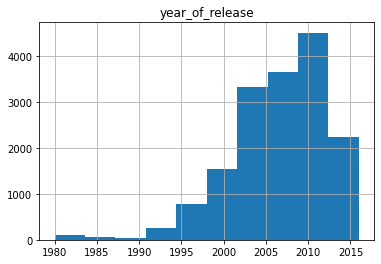

In [18]:
df.hist(column = 'year_of_release')
plt.show()

There is a skewness and according to the business model, data that is before 2000 has uncertainty impact on current (2016) picture.

In [19]:
# changing the datatype for year_of_release to int
df['year_of_release'] = df['year_of_release'].astype(int)

In [20]:
display(df.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
total_sales           0
dtype: int64

We still having missing values for `'critic_score'`, `'user_score'` and `'rating'`. Since it is impossible to fill in the `'user_score'` and `'critic_score'` missing values, we will leave those alone. We will now fill in the missing values for the `'rating'` column with "NA."

In [26]:
display(df['rating'].unique())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [27]:
df['user_score'] = df['user_score'].replace('tbd', 'NaN')

In [28]:
df['user_score'] = df['user_score'].astype('float')

Since we have missing values in the rating column and no way of telling what those ratings would be,
we will create a new column for those missing values. Currently we have:
 - EC - Early childhood
- E - Everyone
- E10+ - Everyone 10 & up
- T -Teen
- M - Mature
- AO - Adults Only 18+
- RP - Rating Pending

In [29]:
df.loc[df["rating"].isna(), "rating"] = "NA"

In [30]:
# double checking for missing values and correct datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           16567 non-null  object 
 11  total_sales      16567 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


### Step 2 summary

 - We have change the columns to lowers case, and have added a `'total_sale'` column to show the sums of sales in all regions for each game. 
 - We removed the rows with missing `'name'` and `'genre'` values (two rows in total) as they had many missing values.
 - With the `'year_of_release'` column, we replaced some of the missing values with dates found on other platforms for the same game. The rest of the missing values were removed.
 - It is impossible to tell what the missing values would be for `'citic_score'` and `'user_score'` we have left those missing values. The 'tbd' value in the `'user_score'` column has been replaced with 'NaN' and will be treated as missing values.
 - The `'rating'` column's missing values were replaced with "NA."
 
We can now continue to the next step of analyzing the data.

## Step 3
### Analyze the data

 - Look at how many games were released in different years. Is the data for every period significant?
- Look at how sales varied from platform to platform. Choose the platforms with the greatest total sales and build a distribution based on data for each year. Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade?
- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.
- Which platforms are leading in sales? Which ones are growing or shrinking? Select several potentially profitable platforms.
- Build a box plot for the global sales of all games, broken down by platform. Are the differences in sales significant? What about average sales on various platforms? Describe your findings.
- Take a look at how user and professional reviews affect sales for one popular platform (you choose). Build a scatter plot and calculate the correlation between reviews and sales. Draw conclusions.
- Keeping your conclusions in mind, compare the sales of the same games on other platforms.
- Take a look at the general distribution of games by genre. What can we say about the most profitable genres? Can you generalize about genres with high and low sales?

In [31]:
# look at how many games were released in different years. Is the data for every period significant?

display(df['year_of_release'].min(), df['year_of_release'].max())
display(df['year_of_release'].value_counts().sort_index())

1980

2016

1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     290
1998     379
1999     339
2000     350
2001     484
2002     845
2003     785
2004     765
2005     948
2006    1019
2007    1202
2008    1440
2009    1431
2010    1270
2011    1153
2012     662
2013     547
2014     582
2015     606
2016     502
Name: year_of_release, dtype: int64

In [32]:
def era_group(year):
    """
    The function returns the era group for games according to the year of release, using the following rules:
    —'retro'   for year < 2000
    —'modern'  for 2000 <= year < 2010
    —'recent'  for year >= 2010
    —'unknown' for missing year values (NaN)
    """

    if year < 2000:
        return 'retro'
    elif year < 2010:
        return 'modern'
    elif year >= 2010:
        return 'recent'
    else:
        return 'unknown'
    
df['era_group'] = df['year_of_release'].apply(era_group)
display(df.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,modern
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NA,40.24,retro
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,modern
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,modern
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NA,31.38,retro
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NA,30.26,retro
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80,modern
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91,modern
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32,modern
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NA,28.31,retro


In [33]:
display(df['era_group'].value_counts().sort_index())

modern    9269
recent    5322
retro     1976
Name: era_group, dtype: int64

Looking at the `'era_group'`, we can see that the retro group is not very significant in comparison to the other two, and that most of the games were released druing the modern period (2000 - 2009).

<AxesSubplot:xlabel='year_of_release', ylabel='Density'>

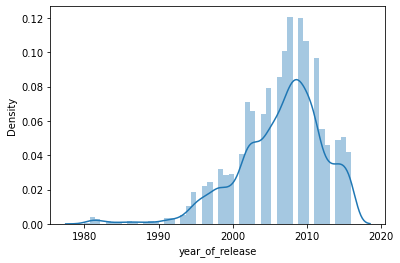

In [34]:
sns.distplot(df['year_of_release'])

In [35]:
# look at how sales varied from platform to platform. 
# choose the platforms with the greatest total sales and build a distribution based on data for each year.

top10_platforms = (df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)).reset_index().head(10)
display(top10_platforms)


top10_years_pivot = df.pivot_table(index = ['platform'], values = ['year_of_release', 'total_sales'], aggfunc = {'year_of_release' : 'unique', 'total_sales' : 'sum'}).sort_values('total_sales', ascending = False).reset_index().head(10)
top10_years = df[df['platform'].isin(top10_platforms['platform'])].sort_values('total_sales', ascending = False)
display(top10_years_pivot)

,platform,total_sales
0,PS2,1247.16
1,X360,966.61
2,PS3,935.19
3,Wii,903.31
4,DS,804.28
5,PS,727.58
6,PS4,314.14
7,GBA,313.73
8,PSP,293.57
9,PC,258.86


,platform,total_sales,year_of_release
0,PS2,1247.16,"[2004, 2002, 2001, 2003, 2006, 2007, 2005, 200..."
1,X360,966.61,"[2010, 2013, 2011, 2012, 2009, 2007, 2008, 200..."
2,PS3,935.19,"[2013, 2012, 2011, 2010, 2009, 2008, 2007, 201..."
3,Wii,903.31,"[2006, 2008, 2009, 2007, 2011, 2010, 2012, 201..."
4,DS,804.28,"[2006, 2005, 2010, 2009, 2004, 2007, 2012, 200..."
5,PS,727.58,"[1997, 1999, 1998, 1996, 2000, 1995, 2001, 200..."
6,PS4,314.14,"[2015, 2014, 2016, 2013]"
7,GBA,313.73,"[2002, 2004, 2001, 2003, 2005, 2007, 2006, 2000]"
8,PSP,293.57,"[2005, 2008, 2006, 2010, 2007, 2009, 2004, 201..."
9,PC,258.86,"[2009, 2004, 2012, 1996, 2010, 1995, 1997, 200..."


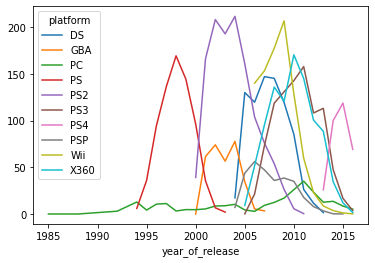

In [36]:
top10_years.pivot_table(index = 'year_of_release', columns = 'platform', values = 'total_sales', aggfunc= 'sum').plot()
plt.show()

As we can see from the distribution, many of the top 10 platforms were popular at different times. It looks as though none of them were very popular before 1995, however.

In [37]:
# Find platforms that used to be popular but now have zero sales.
# How long does it generally take for new platforms to appear and old ones to fade?

df = df[(df['year_of_release'] > 1995)]
all_sales_per_platform =df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False)
platforms = list(all_sales_per_platform.index)

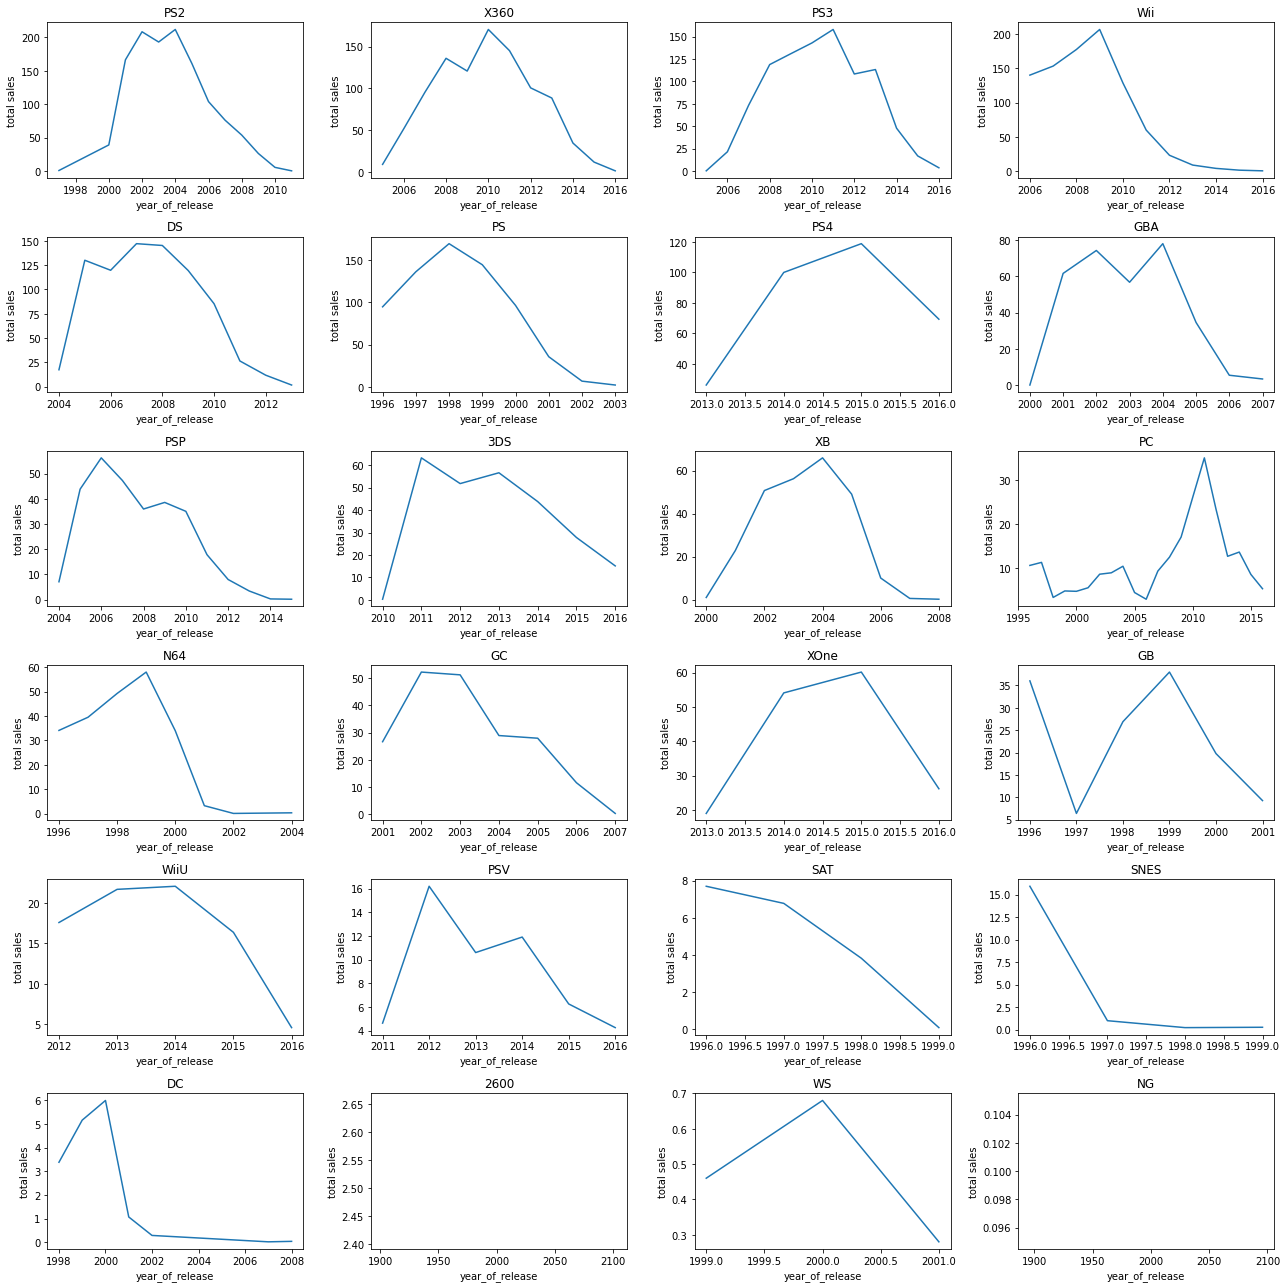

In [38]:
fig, axs = plt.subplots(6, len(platforms) // 6)
axs = axs.flatten()

num = 0
for platform, ax in zip(platforms, axs):
     ((df[df['platform'] == platform]
            .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
            .sort_values('year_of_release', ascending = False))['total_sales']
                .plot(ax = ax, figsize = (18, 18), title = platform)
                .set(xlabel = 'year_of_release', ylabel = 'total sales'))
   
    
plt.tight_layout()
plt.show()

Looking at the graphs, we can see the popularity and then decline for each platform. Platforms released before 2005 have pretty much become obsolete with the rest slowing declining. I believe we should focus on the data after 2013 and disregard the previous years.

In [39]:
df = df[(df['year_of_release'] > 2013)]

In [40]:
# which platforms are leading in sales? Which ones are growing or shrinking?
# select several potentially profitable platforms
# build a box plot for the global sales of all games, broken down by platform
# are the differences in sales significant? 
# what about average sales on various platforms?

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.40
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


(0.0, 1.0)

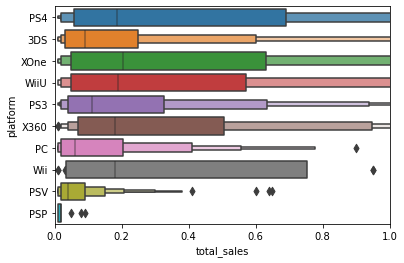

In [41]:
top10_platforms = (df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)).reset_index().head(10)
display(top10_platforms)

sns.boxenplot(x = 'total_sales', y = 'platform', data = df[df['platform'].isin(top10_platforms['platform'])])
plt.xlim([0,1])

Looking at the boxplots of total sales for each of the top 10 platforms, we can see that the top platforms, PS4, and XOne have very similar medians, with the top 3rd, 3DS, not far behind.

Scatter plot critic_score/total sales for PS4


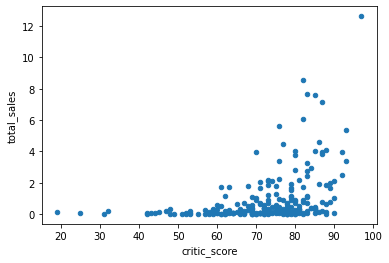

Scatter plot user_score/total sales for PS4


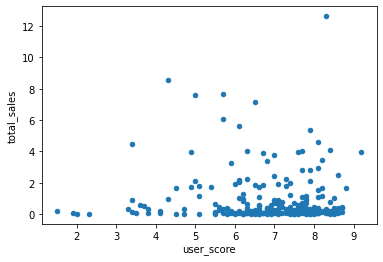

,critic_score,user_score,total_sales
critic_score,1.000000,0.546434,0.401903
user_score,0.546434,1.000000,-0.043186
total_sales,0.401903,-0.043186,1.000000


In [43]:
def draw_scatters(platform):
    print(f'Scatter plot critic_score/total sales for {platform}')
    df.query('platform ==@platform').dropna(subset = ['critic_score', 'user_score']).plot(x = 'critic_score', y = 'total_sales', kind = 'scatter')
    plt.show()
    print(f'Scatter plot user_score/total sales for {platform}')
    df.query('platform ==@platform').dropna(subset = ['critic_score', 'user_score']).plot(x = 'user_score', y = 'total_sales', kind = 'scatter')
    plt.show()
    display(df.query('platform ==@platform').dropna(subset = ['critic_score', 'user_score'])[['critic_score', 'user_score', 'total_sales']].corr())
    
draw_scatters('PS4')    

Scatter plot critic_score/total sales for XOne


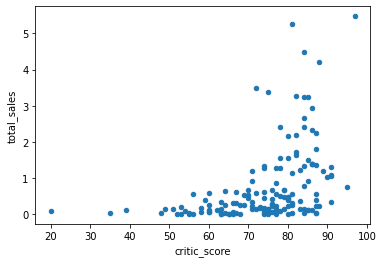

Scatter plot user_score/total sales for XOne


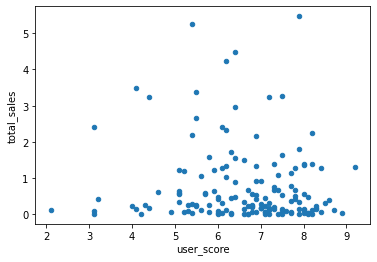

,critic_score,user_score,total_sales
critic_score,1.000000,0.440977,0.422112
user_score,0.440977,1.000000,-0.091734
total_sales,0.422112,-0.091734,1.000000


In [44]:
draw_scatters('XOne')

Scatter plot critic_score/total sales for 3DS


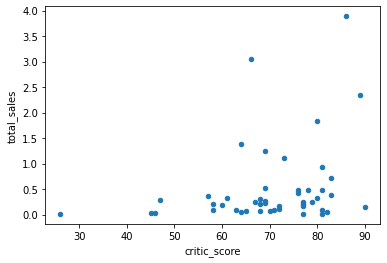

Scatter plot user_score/total sales for 3DS


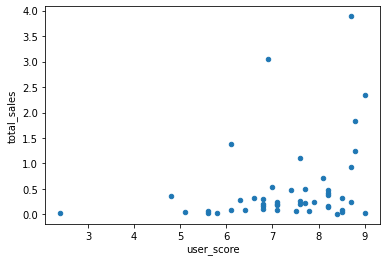

,critic_score,user_score,total_sales
critic_score,1.000000,0.862485,0.284686
user_score,0.862485,1.000000,0.279850
total_sales,0.284686,0.279850,1.000000


In [45]:
draw_scatters('3DS')

Based on our top 3 platform's scatterplots and calculations, it looks as though the user scores have very little correlation and the critic scores have moderate correlation with the total sales for both PS3 and XOne.

In [48]:
# keeping your conclusions in mind, compare the sales of the same games on other platforms.
# take a look at the general distribution of games by genre
# what can we say about the most profitable genres? Can you generalize about genres with high and low sales?

display(df[df['platform'].isin(top10_platforms['platform'])])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,era_group
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NA,14.63,recent
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62,recent
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NA,11.68,recent
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58,recent
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NA,7.98,recent
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01,recent
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01,recent
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01,recent
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NA,0.01,recent


In [49]:
top10_games = (df.pivot_table(index = 'name', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)).reset_index().head(10)
display(top10_games)

top10_games_pivot = df.pivot_table(index = ['name'], values = ['year_of_release', 'total_sales'], aggfunc = {'year_of_release' : 'unique', 'total_sales' : 'sum'}).sort_values('total_sales', ascending = False).head(10)
display(top10_games_pivot)

,name,total_sales
0,Call of Duty: Black Ops 3,25.67
1,Call of Duty: Advanced Warfare,21.97
2,Grand Theft Auto V,19.26
3,FIFA 15,17.37
4,FIFA 16,16.30
5,Minecraft,14.98
6,Fallout 4,12.67
7,Destiny,12.54
8,Super Smash Bros. for Wii U and 3DS,12.42
9,Star Wars Battlefront (2015),12.19


,total_sales,year_of_release
name,,
Call of Duty: Black Ops 3,25.67,[2015]
Call of Duty: Advanced Warfare,21.97,[2014]
Grand Theft Auto V,19.26,"[2014, 2015]"
FIFA 15,17.37,[2014]
FIFA 16,16.30,[2015]
Minecraft,14.98,"[2014, 2016]"
Fallout 4,12.67,[2015]
Destiny,12.54,[2014]
Super Smash Bros. for Wii U and 3DS,12.42,[2014]


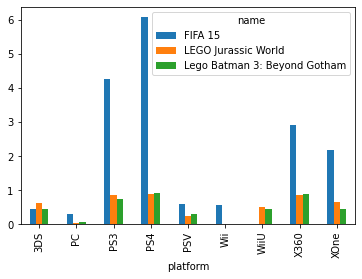

In [52]:
games_many_platforms = df['name'].value_counts()[1:4]
(df.query('name in @games_many_platforms.index')
   .pivot_table(index = 'platform', columns = 'name', values = 'total_sales', aggfunc = 'sum')
   .plot(kind = 'bar'));

Although the Wii is an older platform, many of the most popular games were released on the Wii. Other popular platforms were Xbox and Playstation. The PS3, PS2 and X360 had the best sale of one game.

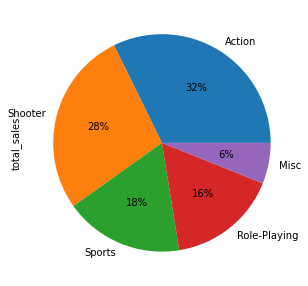

In [54]:
data = (df.pivot_table(index = 'genre', aggfunc = 'sum').sort_values('total_sales', ascending = False).head(5))
data.plot(kind = 'pie', y = 'total_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

Looking at the pie chart, we can see that the most popular genre is action followed by sports.

,genre,total_sales
0,Action,199.71
1,Shooter,170.94
2,Sports,109.48
3,Role-Playing,101.44
4,Misc,37.55


(0.0, 1.0)

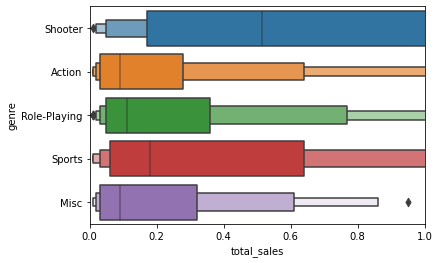

In [55]:
top5_genres = (df.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values('total_sales', ascending = False)).reset_index().head()
display(top5_genres)

sns.boxenplot(x = 'total_sales', y = 'genre', data = df[df['genre'].isin(top5_genres['genre'])])
plt.xlim([0,1])

Although the most popular genre is Action, the Shooter genre has the highest median.

## Step 4
### Create a user profile for each region
For each region (NA, EU, JP), determine:
 - The top five platforms. Describe variations in their market shares from region to region.
- The top five genres. Explain the difference.
- Do ESRB ratings affect sales in individual regions?

#### NA Region

In [56]:
# top 5 platforms

top10_na_platforms = (df.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum').sort_values('na_sales', ascending = False)).reset_index().head()
display(top10_na_platforms)

,platform,na_sales
0,PS4,98.61
1,XOne,81.27
2,X360,28.30
3,3DS,22.64
4,PS3,22.05


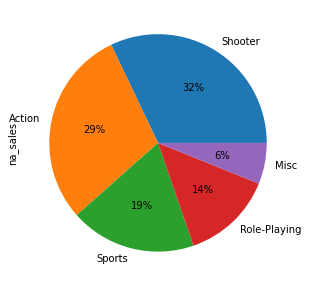

In [57]:
# top 5 genres

na_genre_data = (df.pivot_table(index = 'genre', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5))
na_genre_data.plot(kind = 'pie', y = 'na_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

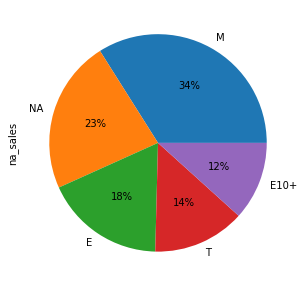

In [58]:
# do ESRB ratings affect sales in individual regions?

na_rating_data = (df.pivot_table(index = 'rating', aggfunc = 'sum').sort_values('na_sales', ascending = False).head(5))
na_rating_data.plot(kind = 'pie', y = 'na_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

Now that we have the data we need for the NA region, let's compare it to the other regions.

#### EU Region

In [59]:
# top 5 platforms

top10_eu_platforms = (df.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum').sort_values('eu_sales', ascending = False)).reset_index().head()
display(top10_eu_platforms)

,platform,eu_sales
0,PS4,130.04
1,XOne,46.25
2,PS3,25.54
3,PC,18.22
4,3DS,16.12


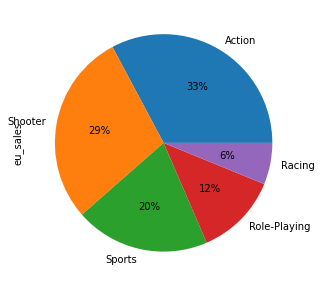

In [60]:
# top 5 genres

eu_genre_data = (df.pivot_table(index = 'genre', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head(5))
eu_genre_data.plot(kind = 'pie', y = 'eu_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

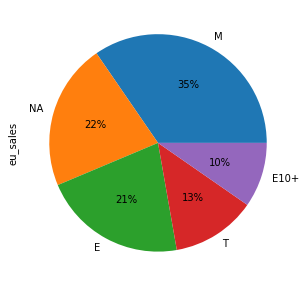

In [61]:
# do ESRB ratings affect sales in individual regions?

eu_rating_data = (df.pivot_table(index = 'rating', aggfunc = 'sum').sort_values('eu_sales', ascending = False).head(5))
eu_rating_data.plot(kind = 'pie', y = 'eu_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

For the EU region, we can see that the top platforms total average sales are not as high as the NA region. The top platforms here are similar to those in the NA region, but with the PC being in the top 5 rather than the X360.

The most popular genres are almost identical to those most popular in the NA region except for Action and Shooter being switched from first to second and Racing included instead of Misc.

The ratings for both the EU region and NA region are also almost identical.

#### JP Region

In [62]:
# top 5 platforms

top10_jp_platforms = (df.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum').sort_values('jp_sales', ascending = False)).reset_index().head()
display(top10_jp_platforms)

,platform,jp_sales
0,3DS,44.24
1,PS4,15.02
2,PSV,14.54
3,PS3,11.22
4,WiiU,7.31


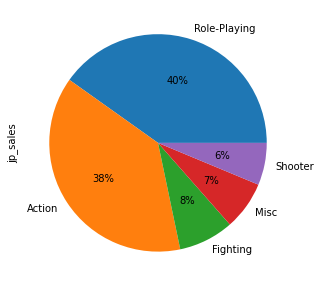

In [63]:
# top 5 genres

jp_genre_data = (df.pivot_table(index = 'genre', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head(5))
jp_genre_data.plot(kind = 'pie', y = 'jp_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

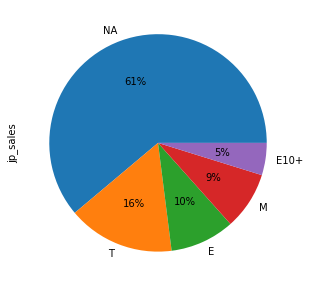

In [64]:
# do ESRB ratings affect sales in individual regions?

jp_rating_data = (df.pivot_table(index = 'rating', aggfunc = 'sum').sort_values('jp_sales', ascending = False).head(5))
jp_rating_data.plot(kind = 'pie', y = 'jp_sales', autopct ='%1.0f%%', figsize=(10, 5), legend=False).set(label=data.index)
plt.show()

Compared to the other two regions, JP top platforms are very different. The sales in this region are even smaller than the EU region and the top platforms do not include xbox products at all. It's clear to see that Nintendo and Sony Playstation dominate the market in the JP region.

The most popular genres are also very different for this region compared to the other two with Role-Playing being the most popular in JP. Another genre in the top 5 that is not included in the other regions is Fighting.

The ratings for the JP region are unique in that over 50% of their sales are in the NA rating. I believe this may be because this region has ratings that the EU and NA regions do not have.

## Step 5
### Test the following hypotheses:
 - Average user ratings of the Xbox One and PC platforms are the same.
 - Average user ratings for the Action and Sports genres are different.
Set the alpha threshold value yourself.

Explain:
 - How you formulated the null and alternative hypotheses
 - What significance level you chose to test the hypotheses, and why

In [65]:
H_0 = "Average user ratings of the Xbox One and PC platforms are similar."
H_1 = "Average user ratings of the Xbox One and PC platforms are different."

pc = df[df['platform'] == 'PC'].dropna()['user_score'].values
xbox = df[df['platform'] == 'XOne'].dropna()['user_score'].values
alpha = .05

result = st.ttest_ind(pc, xbox)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)

pvalue: 0.15540350980038523
Average user ratings of the Xbox One and PC platforms are similar.


In [66]:
H_0 = 'Average user ratings for the Action and Sports genres are similar.'
H_1 = 'Average user ratings for the Action and Sports genres are different.'

action = df[df['genre'] == 'Action'].dropna()['user_score'].values
sports = df[df['genre'] == 'Sports'].dropna()['user_score'].values
alpha = .05

result = st.ttest_ind(action, sports)
print('pvalue:', result.pvalue)

if (result.pvalue < alpha):
    print(H_1)
else:
    print(H_0)

pvalue: 3.191179905003872e-10
Average user ratings for the Action and Sports genres are different.


As we can see with testing our hypotheses, the user ratings are similar between the Xbox One and PC platforms. The user ratings are different from the action and the sports genres, though. (With having to delete some of the data, there is a chance there is some variance in our hypothesis conclusions.)

## Step 6
### Write a general conclusion

- Top selling platforms did not become popular until after 1995
- Platforms released before 2005 have pretty much become obsolete with the rest slowing declining.
- We have decided data collected prior to 2013 is irrelevant. 
- Using the example of Playstation platforms, the user scores have little correlation and the critic scores have moderate correlation with the total sales.
- Although the Wii is an older system, many of the most popular games were released for the Wii platform
- Overall, the most popular genre of games was action followed by sports, but the Shooter genre has the highest median.
- The NA region generates the highest number of sales per platform
- The EU and NA regions are similar in their top platforms, genre and ESRB rating. The JP region generates the smallest number of sales per platform and varies quite a bit from the other two regions in top platforms, genres and ESRB ratings.
- We found that the user rating vary from the action and sports genres but are similar between Xbox One and PC platforms by testing the following hypotheses:
        
        Average user ratings of the Xbox One and PC platforms are the same.
        Average user ratings for the Action and Sports genres are different.